<a href="https://colab.research.google.com/github/atharva-mohite/Assignment-ML_Level-1/blob/main/Atharva_Mohite_Assignment_ML_Level_1_Ans_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-2: Implementing Person Detection Using YOLOv5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# the path to the YOLOv5 repository
yolov5_path = '/content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/yolov5'

# Clone the YOLOv5 repository into the specified Google Drive folder
!git clone https://github.com/ultralytics/yolov5.git {yolov5_path}

fatal: destination path '/content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/yolov5' already exists and is not an empty directory.


In [2]:
%cd {yolov5_path}
# Install dependencies
!pip install -r requirements.txt

/content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/yolov5


## Train YOLOv5

In [3]:
# Assuming the dataset is stored in Google Drive
# Adjust the path as per your Google Drive structure

# Create symbolic links to the dataset in the YOLOv5 directory
!ln -s /content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/dataset/train ./train
!ln -s /content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/dataset/valid ./valid
!ln -s /content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/dataset/test ./test

# Check the dataset structure
!ls train
!ls valid
!ls test

ln: failed to create symbolic link './train/train': File exists
ln: failed to create symbolic link './valid/valid': File exists
ln: failed to create symbolic link './test/test': File exists
images	labels	labels.cache  train
images	labels	labels.cache  valid
images	labels	labels.cache  test


In [4]:
# Create dataset configuration file
person_yaml = """
train: ./train/images
val: ./valid/images
test: ./test/images

# number of classes
nc: 1

# class names
names: ['person']
"""
with open("person.yaml", "w") as f:
    f.write(person_yaml)

In [5]:
# Start training
!python train.py --img 416 --batch 16 --epochs 50 --data person.yaml --weights yolov5s.pt --cache --hyp data/hyps/hyp.scratch-high.yaml

2024-08-11 11:16:44.611625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 11:16:44.836501: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 11:16:44.905620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=person.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, opt

## Test pre-trained YOLOv5

to use model weights obtained after training model with data augmentation (most accurate)

In [9]:
!python val.py --weights runs/train/exp_augment/weights/best.pt --data person.yaml --img 416 --task test

val: data=person.yaml, weights=['runs/train/exp_augment/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/dataset/test/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.05it/s]
                   all         35         69      0.989      0.957      0.992      0.648
Speed: 0.1ms pre-process, 13.9ms inference, 20.3ms NMS per i

to use model weights obtained after training model with no augmentation

In [6]:
!python val.py --weights runs/train/exp_no_augment/weights/best.pt --data person.yaml --img 416 --task test

val: data=person.yaml, weights=['runs/train/exp_no_augment/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/dataset/test/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:36<00:00, 18.41s/it]
                   all         35         69      0.985      0.951      0.977      0.532
Speed: 0.1ms pre-process, 16.1ms inference, 34.5ms NMS pe

to use model weights obtained after training model recently after running 'Train YOLOv5' section

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data person.yaml --img 416 --task test

## Inference YOLOv5

Saving validate.jpg to validate.jpg
detect: weights=['runs/train/exp_augment/weights/best.pt'], source=validate.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Atharva_Mohite_Assignment-ML_Level-1_submission/Ans-2/yolov5/validate.jpg: 416x416 3 persons, 8.0ms
Speed: 0.5ms pre-process, 8.0ms inference, 876.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detec

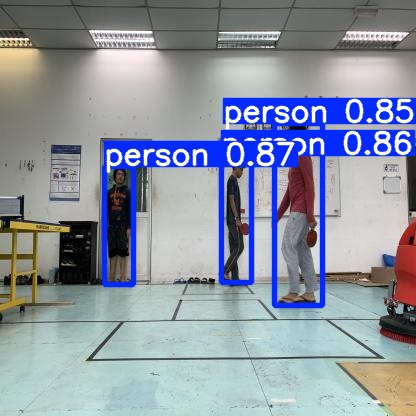

In [10]:
import os
from google.colab import files
import cv2 as cv
from google.colab.patches import cv2_imshow

# Upload image
uploaded = files.upload()

# Get the uploaded image file name
image_path = list(uploaded.keys())[0]

# Run YOLOv5 inference on the uploaded image
# to use model weights obtained after training model with data augmentation
!python detect.py --weights runs/train/exp_augment/weights/best.pt --source {image_path} --img 416 --conf 0.4

# Display the result using cv2_imshow
result_img = cv.imread(f'runs/detect/exp/{image_path}')
cv2_imshow(result_img)
os.remove(image_path)